# Superdense Coding
Date: Sept 19, 2020

By: Sanjib Katuwal

Quantum Teleportation was a process by which the state of a qubit $(|\psi\rangle) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. On the other hand, Superdense coding is a procedure that allows someone to send two classical bits to another location using a single bit of communication. Thus, the teleportation protocal can be thought of as a flipped version of the superdense coding protocol.

In [1]:
# import necessary materials
from qiskit import QuantumCircuit, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram

In [9]:
def create_bell_pair(qc,a=0,b=1):
    """Creates a bell pair"""
    qc.h(b)
    qc.cx(b,a)
    qc.barrier()

In [24]:
def sender_gate(qc,bit_2,bit_1,a=0):
    """Sender uses this function to encode their message"""
    if bit_1==1:
        qc.z(a)
    if bit_2==1:
        qc.x(a)
    if bit_1==1 or bit_2==1:
        qc.barrier()

In [15]:
def receiver_gate_measurement(qc,a=0,b=1,ca=0,cb=1):
    """This is receiver's gate to decode the message"""
    qc.cx(a,b)
    qc.h(a)
    qc.barrier()
    qc.measure(a,ca)
    qc.measure(b,cb)

In [38]:
def superdense_coding(bit_2,bit_1):
    """It transfers two given bits using a qubit"""
    #Checking input
    if bit_1>1 or bit_1<0 or bit_2>1 or bit_2<0:
        print("The inputs should each be either 0 or 1. Please try again. Sending 00 for now.")
    
    # setup
    qc=QuantumCircuit(2,2)
    
    # creating bell pair
    create_bell_pair(qc)
    
    # Encoding message by sender
    sender_gate(qc,bit_2,bit_1)
    
    # Decoding message
    receiver_gate_measurement(qc)
    
    # Draw the circuit
    display(qc.draw('mpl'))  
    
    return qc
    

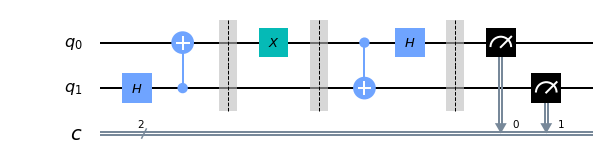

In [41]:
qc=superdense_coding(1,0)

### Visualizing the measurement

{'10': 1024}


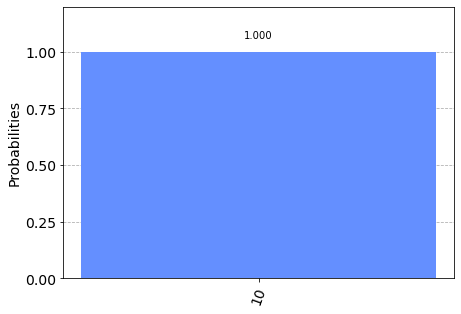

In [42]:
backend = BasicAer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()
sim_counts = sim_result.get_counts()
print(sim_counts)
plot_histogram(sim_counts)

### Visualizing using Real IBM computer

In [44]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.providers.ibmq import least_busy

ibmqfactory.load_account:WARNING:2020-09-19 21:52:29,909: Credentials are already in use. The existing account in the session will be replaced.


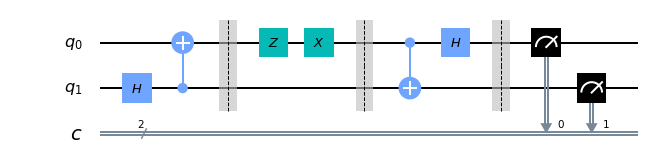

least busy backend:  ibmq_16_melbourne
Job Status: job has successfully run
{'01': 88, '00': 15, '11': 838, '10': 83}


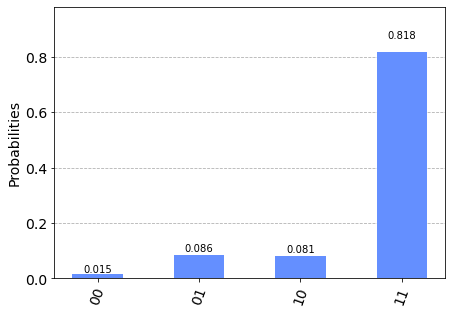

In [45]:
qc=superdense_coding(1,1)
backend=least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >=2 and not x.configuration().simulator
                                    and x.status().operational==True))
print("least busy backend: ", backend)
job = execute(qc, backend, shots=1024)

#  monitoring job
from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)